In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")

sns.set_theme(
    style="whitegrid",
    palette="pastel",
    context="notebook"
)


In [389]:
df = pd.read_csv("netflix_titles.csv")

In [390]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [392]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [393]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [394]:
#drop show_id column it is not needed
df.drop(columns=['show_id'], inplace=True)

In [395]:
#processing the directors column
df['director'].nunique()

4528

In [396]:
df['director'].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], shape=(4529,), dtype=object)

In [397]:
#fill directors column with unknown
df['director'] = df['director'].fillna('Unknown')

In [398]:
#fill cast column with unknown
df['cast'] = df['cast'].fillna('Unknown')

In [399]:
#fill country column with unknown
df['country'] = df['cast'].fillna('Unknown')

In [400]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [401]:
df.isnull().sum()

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [402]:
df['duration'] = df['duration'].fillna(df['duration'].mode().iloc[0])

In [403]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [404]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [405]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

In [406]:
df.drop(columns=['duration', 'date_added'], inplace=True)

In [407]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
listed_in       0
description     0
year_added      0
month_added     0
day_added       0
dtype: int64

In [408]:
# Check number of duplicates
print(df.duplicated().sum())
print(df.duplicated(subset=['title','release_year']).sum())

0
0


In [409]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

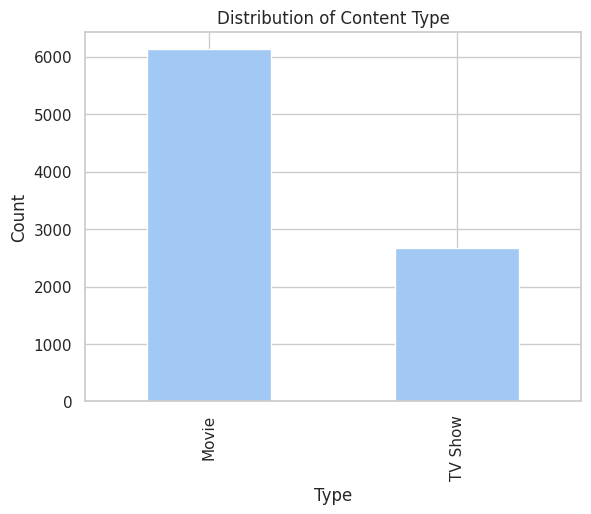

In [410]:
df['type'].value_counts().plot(
    kind='bar',
    title='Distribution of Content Type',
    ylabel='Count',
    xlabel='Type'
)
plt.show()

In [411]:
df['rating'].value_counts()

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

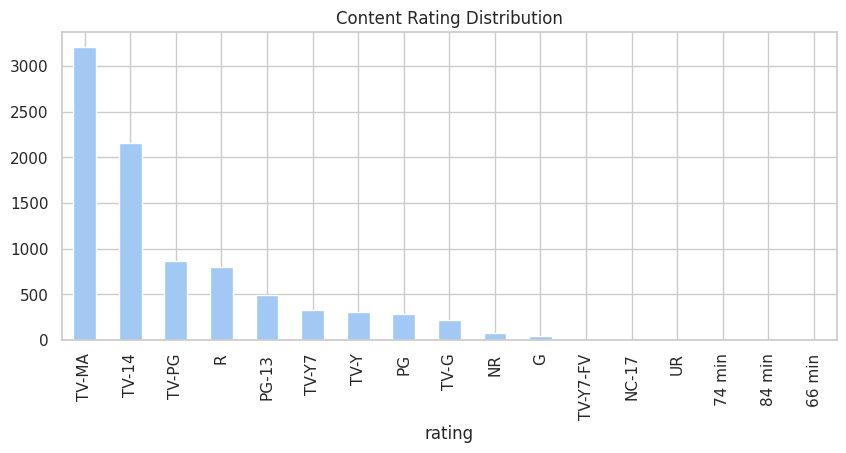

In [412]:
df['rating'].value_counts().plot(
    kind='bar',
    figsize=(10,4),
    title='Content Rating Distribution'
)
plt.show()

In [413]:
df['release_year'].describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

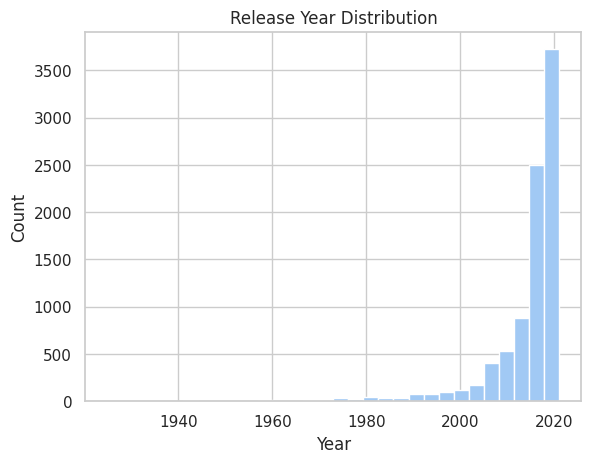

In [414]:
plt.hist(df['release_year'], bins=30)
plt.title('Release Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [415]:
df['country'].value_counts().head(10)

country
Unknown                                                                                                                   825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
David Spade, London Hughes, Fortune Feimster                                                                                6
Craig Sechler                                                                                                 

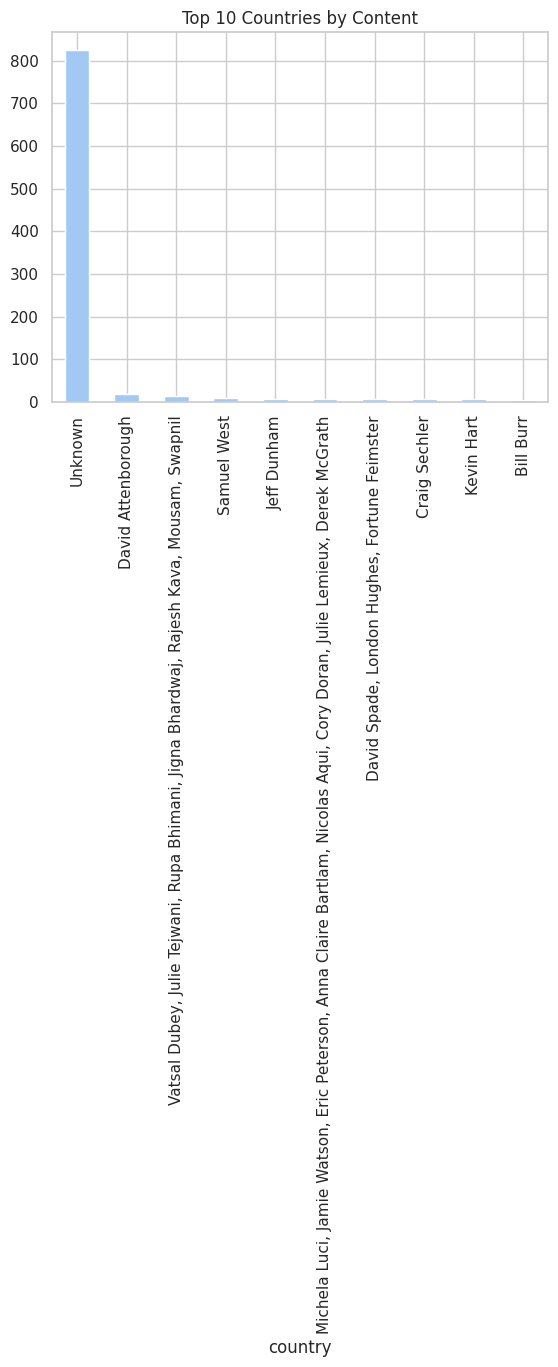

In [416]:
df['country'].value_counts().head(10).plot(
    kind='bar',
    title='Top 10 Countries by Content'
)
plt.show()

In [417]:
pd.crosstab(df['type'], df['rating'])

rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,,,,
Movie,1,1,1,41,3,75,287,490,797,1427,126,2064,540,131,139,5,3
TV Show,0,0,0,0,0,5,0,0,2,733,94,1147,323,176,195,1,0


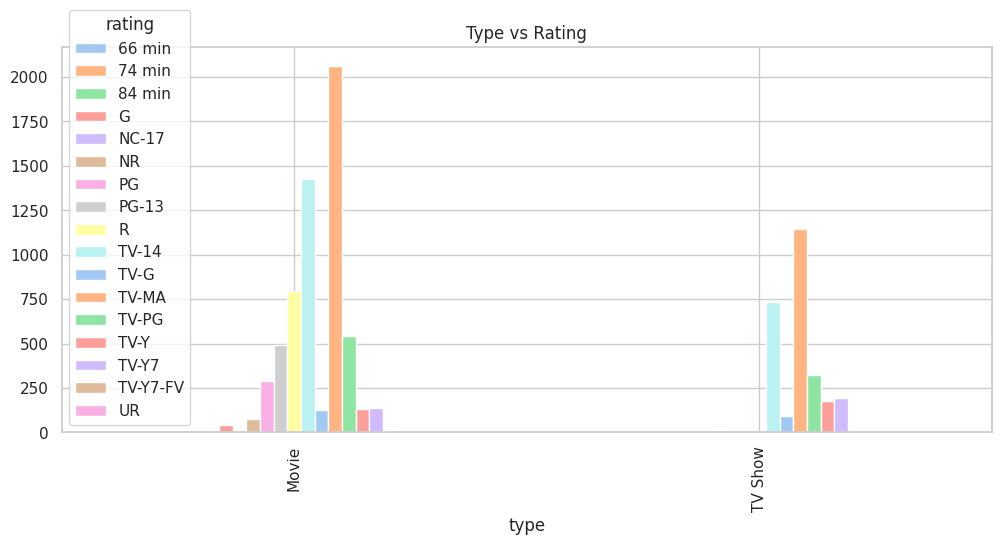

In [418]:
pd.crosstab(df['type'], df['rating']).plot(
    kind='bar',
    figsize=(12,5),
    title='Type vs Rating'
)
plt.show()

In [419]:
df.groupby('release_year').size()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Length: 74, dtype: int64

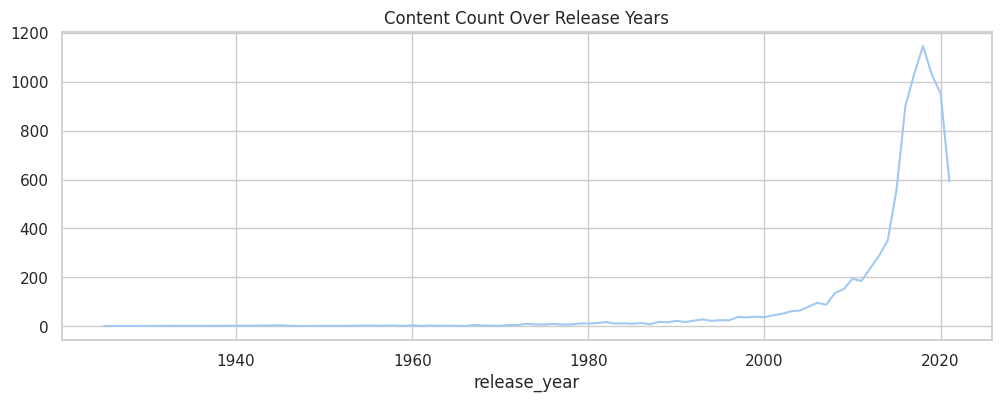

In [420]:
df.groupby('release_year').size().plot(
    figsize=(12,4),
    title='Content Count Over Release Years'
)
plt.show()